The script is based on the analysis of the paper cited below :

Weeks, R., & Ostermeier, M. (2023). Fitness and Functional Landscapes of the E. coli RNase III Gene rnc. Molecular Biology and Evolution, 40(3), msad047.

All the fitness score are available in the supplimentary excel Supplementary Data S1 - S10 which can be accessed through link : https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/mbe/40/3/10.1093_molbev_msad047/1/msad047_supplementary_data.zip?Expires=1701333486&Signature=wC4KNyEzrA5HbgMW00usmwJkKdCc1GKGYqkXnCfkN8v~JoJCCunnmlKo~-kk4FdQHtognzsxfFJVmqHWfMR4~m8LM4yxwWQ4VS3uTKV5PDzASw5Dsip4rBN5GzY-FsTBStVYQ-Okh4pTqIauxKbD5e1k4N1NmS0O73Ct6lHTuMveVwukZ3jEYLs89mzbTyZRYYOgHdkfD33-W94DgWfZYb09VeK~e1Yqdh5xv-vdjiUnnZBnVfbrkGqvN4VhEFXZB~-ytjghXAPswJ7WpldUhW0~YMRTeLyrKRtt3cmYSBcjb-zA25jOTXLNTQtOoy059qDE27LGug9ojSObBPi8-A__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA

#### Screenshot of score used in main data set as per paper.

##### Fitness (weighted mean) score --> available in Supplimentary Data S1.xlsx
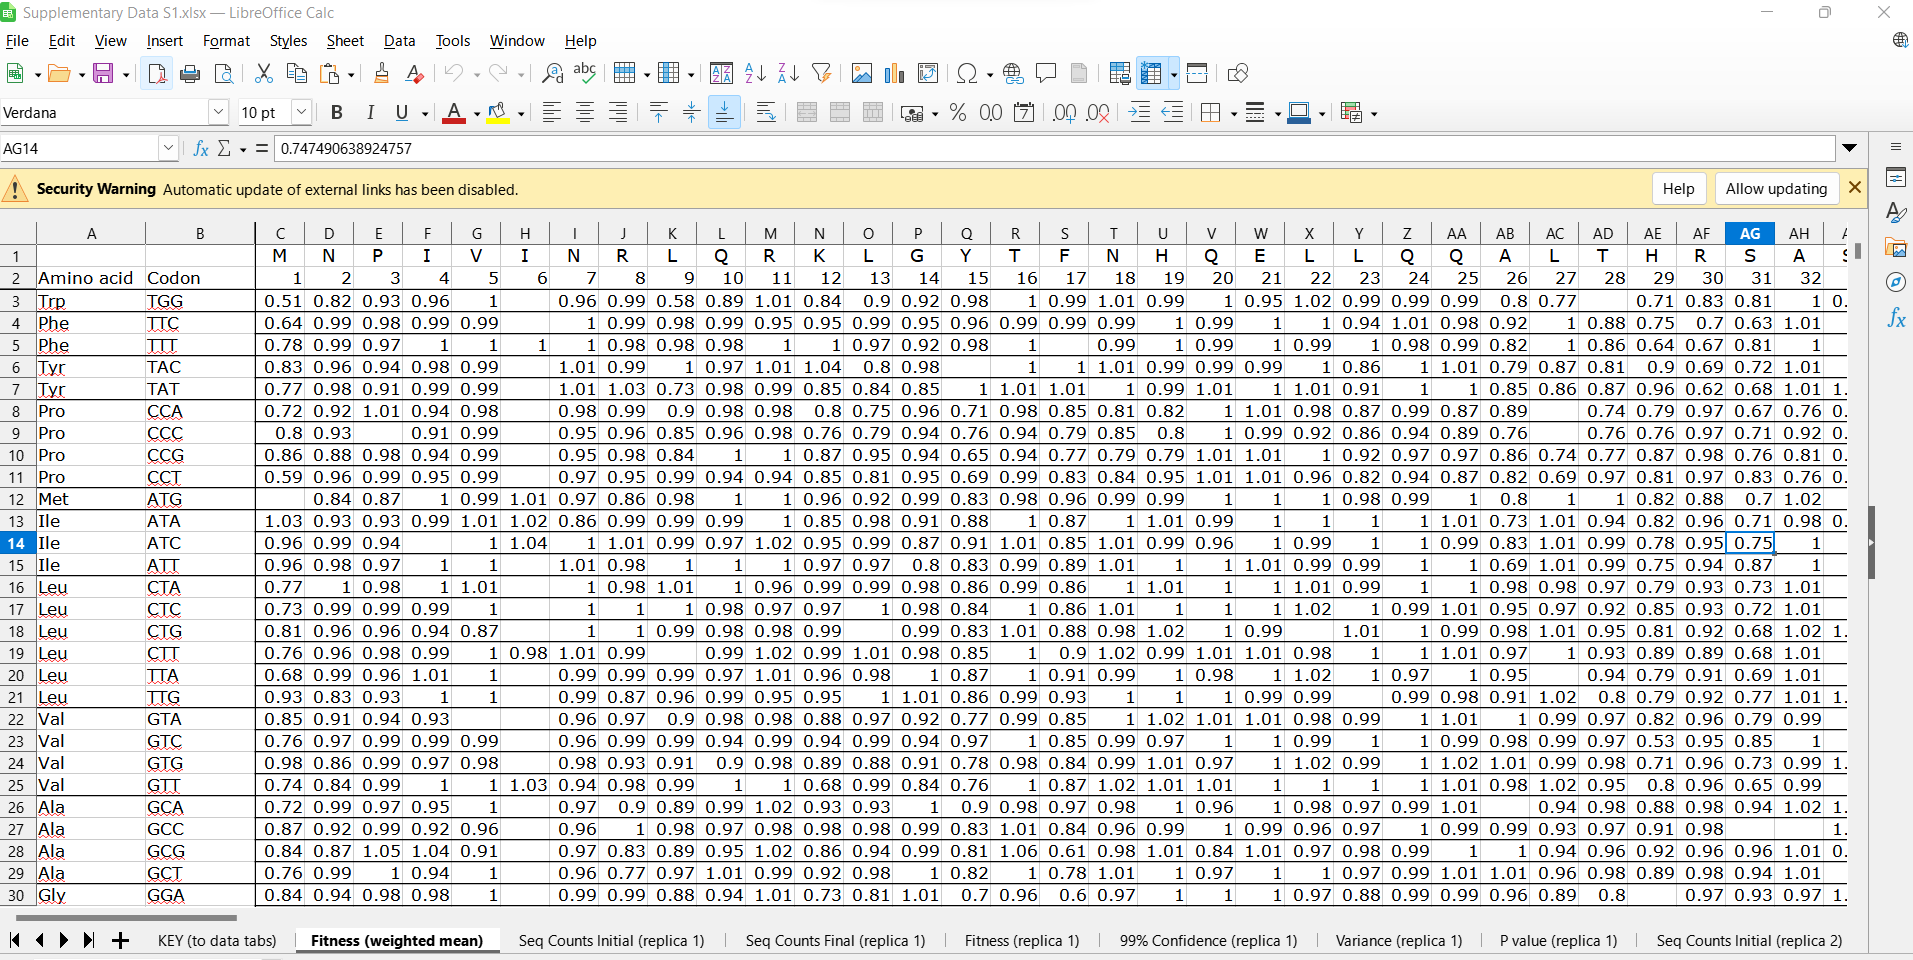


##### Transformation Score --> available in Supplimentary Data S2.xlsx
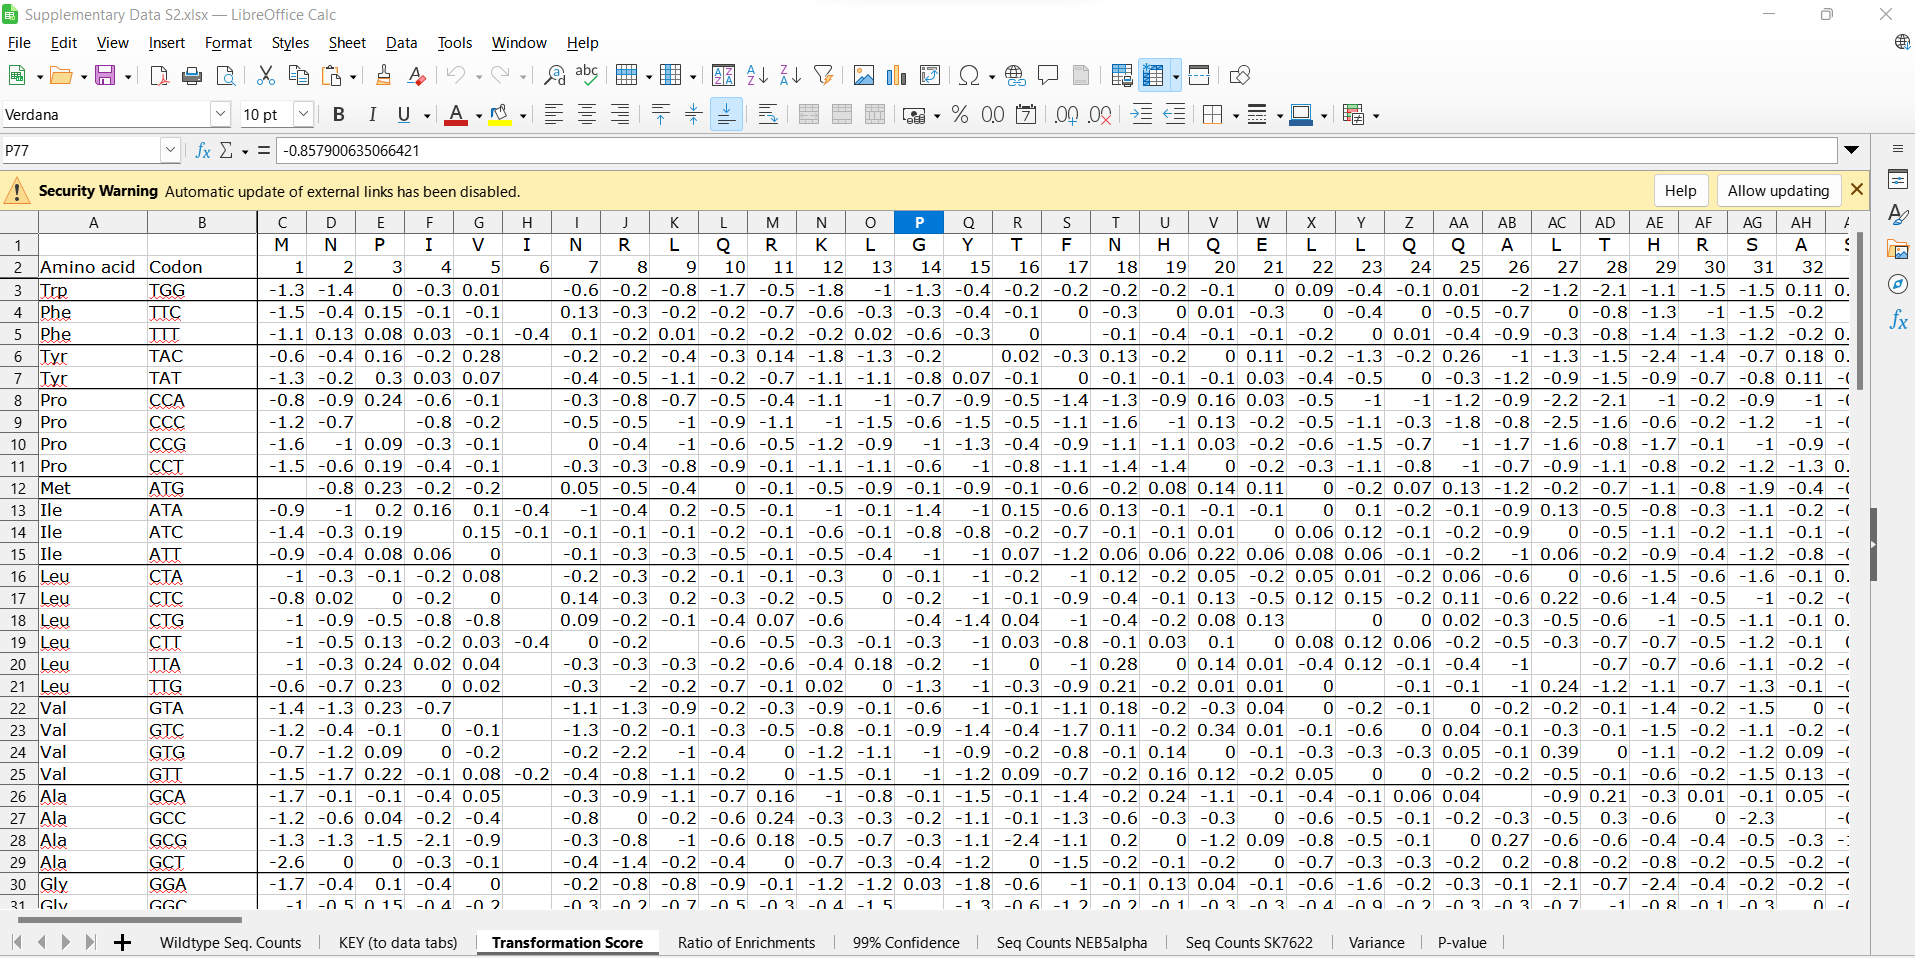


##### Functional score(weighted mean) --> available in Supplimentary Data S3.xlsx

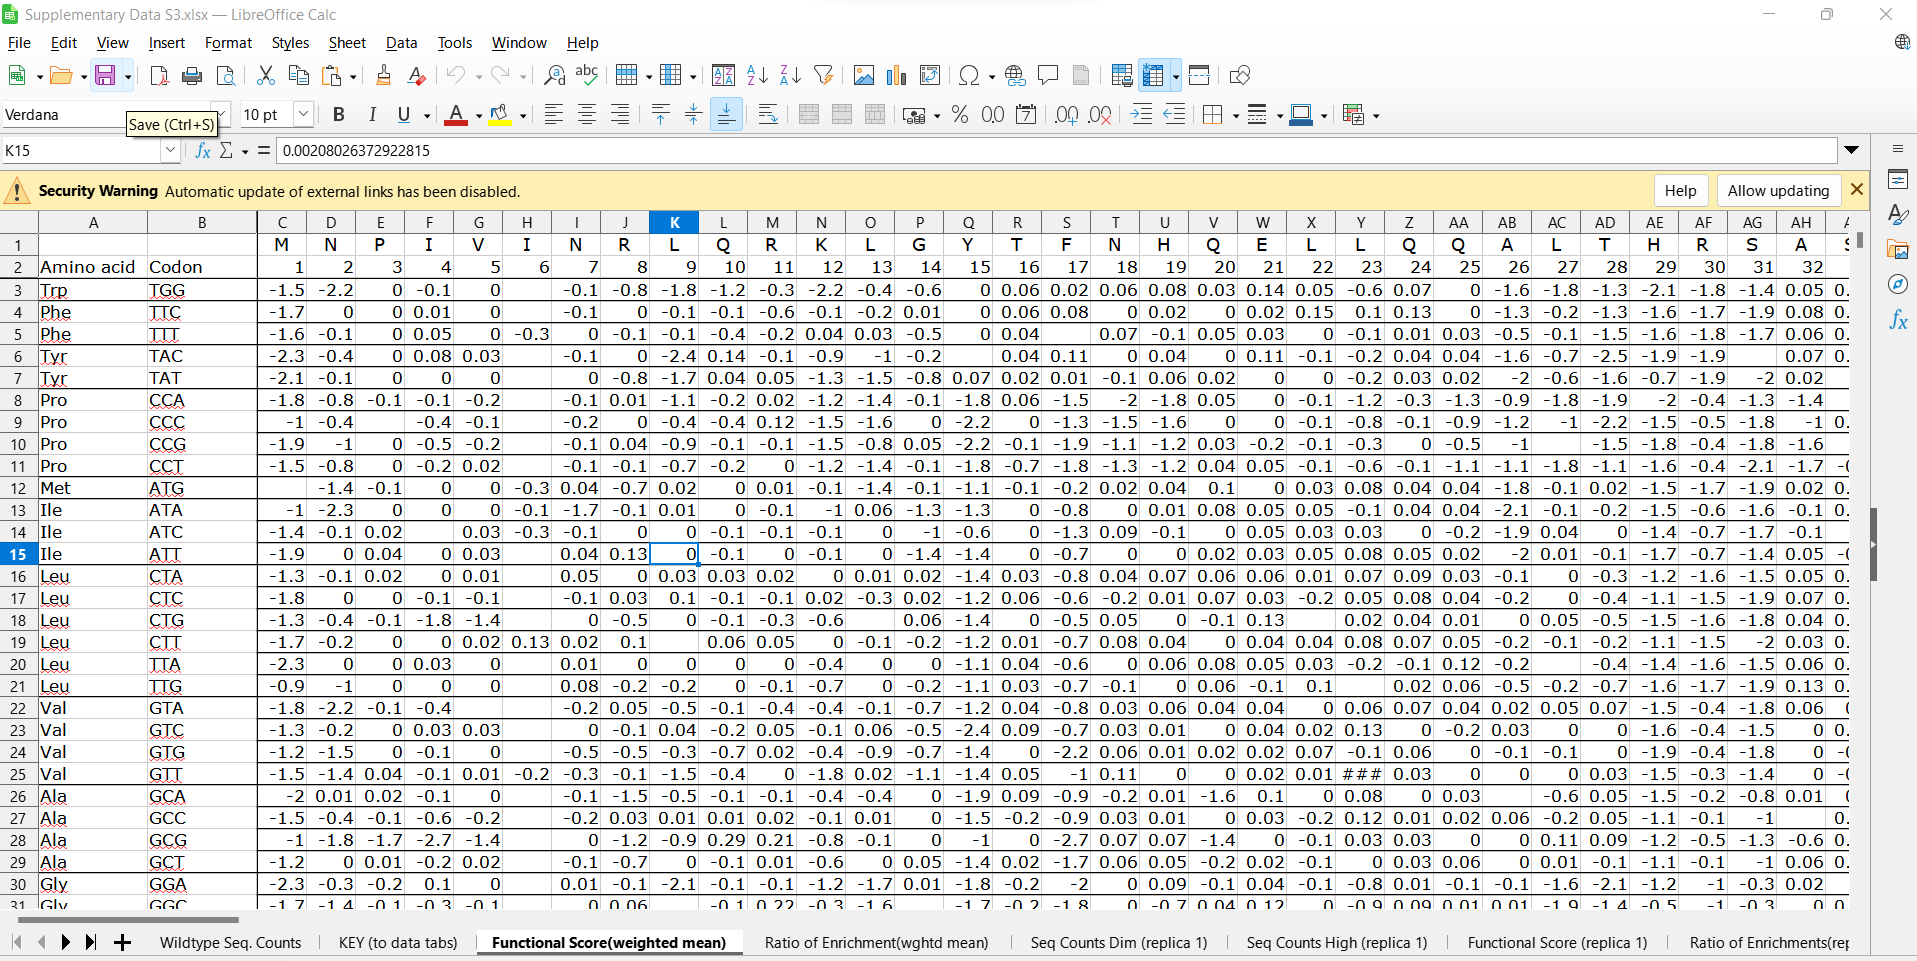

##### To facilitate convenient usage, we have consolidated the required scores into a single metadata file named rnc_metadata.xlsx. Attached below is a screenshot of the file.

The Fitness (weighted mean) score can be found in the 'weighted fitness mean' sheet within rnc_metadata.xlsx.

The Transformation Score is located in the 'Transformation Score' sheet in rnc_metadata.xlsx.

The Functional score (weighted mean) is documented in the 'Functional score (weighted mean)' sheet in rnc_metadata.xlsx.

Additionally, in the metadata sheet, a column labeled 'aa' has been included to represent the single-letter amino acid.


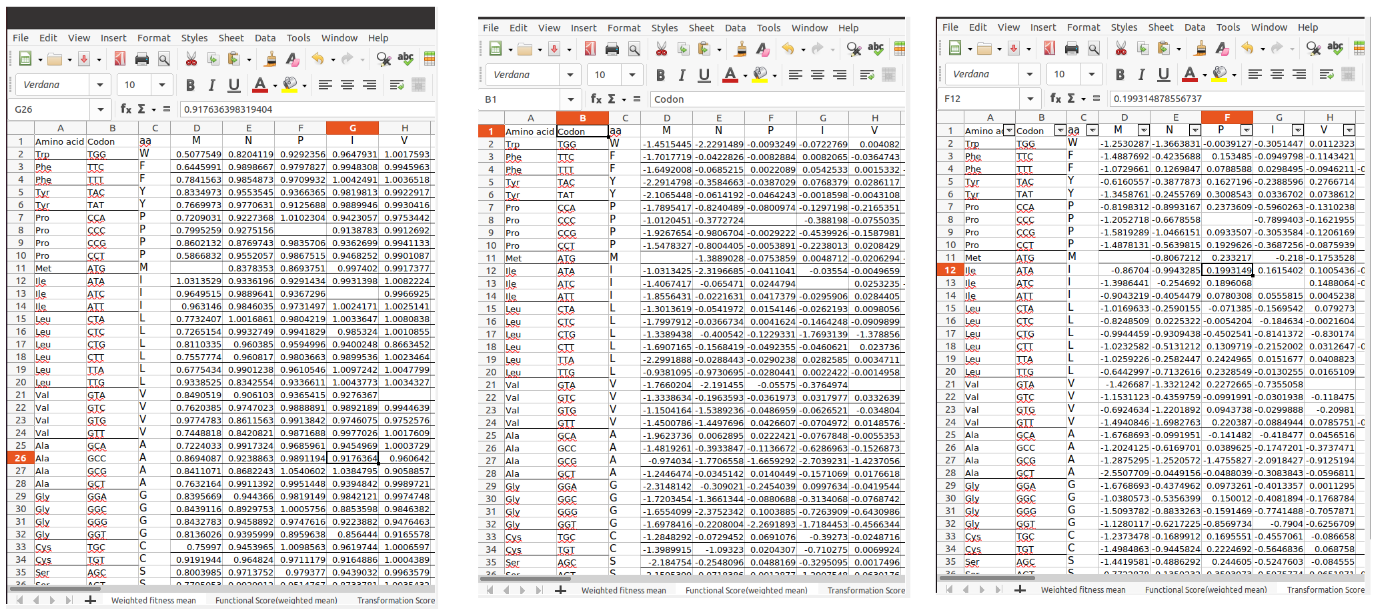

# RNC gene analysis 

##### The RNC gene encodes the RNaseIII protein, comprising 226 amino acids (source: https://www.uniprot.org/uniprotkb/P0A7Y2/entry#structure). To facilitate analysis, the initial dataset results were consolidated into a metasheet, which included weighted fitness means, functional scores (weighted means), and transformation scores.

#### Step 1 - import libary

In [ ]:
# !pip install pandas==2.1.2

In [ ]:
import importlib
#importlib.reload(utility)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import urllib
from argparse import Namespace
from pathlib import Path
import itertools
import os
from typing import Sequence, Tuple, List, Union
import torch
from esm.constants import proteinseq_toks
import importlib
pd.set_option('mode.chained_assignment', None)
import utility
importlib.reload(utility)
import esm1b

### user defined function used in the script ( For more details please refer to utility.py)


#### Step 2 - Function group mean --> Codon 

In [ ]:
 # grouped_amino_acid_Weighted_fitness_mean: Dataframe containing average of Weighted fitness mean for each mutant amino acid at each position
grouped_amino_acid_Weighted_fitness_mean =  utility.return_groupwise_amino_acid(filepath = "../data/rnc_metadata.xlsx", sheet_name= "Weighted fitness mean")
grouped_amino_acid_Weighted_fitness_mean.head()

 ##### grouped_amino_acid_functional_score_weighted_mean : Dataframe containing average of Functional score(weighted mean) for each mutant amino acid at each position


In [5]:
grouped_amino_acid_functional_score_weighted_mean =  utility.return_groupwise_amino_acid(filepath ="../data/rnc_metadata.xlsx", sheet_name=  "Functional Score(weighted mean)") 
grouped_amino_acid_functional_score_weighted_mean.head()

/home/abhishekh/Downloads/Oligo_Promotion-main_latest/Oligo_Promotion-main/RNC/scripts/utility.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_amino_acid= df.iloc[:, 2:].groupby('aa').mean().reset_index()


,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
aa,,,,,,,,,,,,,,,,,,,,,
W,-1.451545,-2.229149,-0.009325,-0.072277,0.004082,NaN,-0.132491,-0.823618,-1.795704,-1.221098,...,0.100786,-0.740892,0.013543,-0.058021,0.001818,0.051971,0.047020,0.022295,0.036646,0.040848
F,-1.675486,-0.055402,-0.003040,0.031230,-0.017471,-0.258165,-0.049862,-0.048910,-0.092857,-0.234605,...,0.024413,0.015192,-0.032143,-0.110902,0.030675,-0.050666,0.256936,-0.025212,0.002136,-0.169289
Y,-2.199012,-0.209943,-0.042564,0.037489,0.012150,NaN,-0.033230,-0.418724,-2.036646,0.087565,...,0.026622,0.134803,0.019373,0.033941,0.031772,-0.014276,-0.050110,0.037944,0.039089,-0.000016
P,-1.569046,-0.745608,-0.029470,-0.298928,-0.107498,NaN,-0.133228,-0.022467,-0.813634,-0.211973,...,-1.208407,-0.200136,-1.247814,-1.094315,0.063953,-0.020332,-0.029103,0.008831,-0.021731,0.013016
M,NaN,-1.388903,-0.075386,0.004871,-0.020629,-0.328040,0.035151,-0.675532,0.023060,0.000204,...,0.180027,0.029879,0.029137,0.091199,0.037047,0.011922,0.068101,-0.053223,0.001132,-0.006800


 ##### grouped_amino_acid_transformation_score :Dataframe containing average of Transformation Score for each mutant amino acid at each position


In [6]:
grouped_amino_acid_transformation_score =  utility.return_groupwise_amino_acid(filepath = "../data/rnc_metadata.xlsx", sheet_name= "Transformation Score")
grouped_amino_acid_transformation_score.head() 

/home/abhishekh/Downloads/Oligo_Promotion-main_latest/Oligo_Promotion-main/RNC/scripts/utility.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_amino_acid= df.iloc[:, 2:].groupby('aa').mean().reset_index()


,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
aa,,,,,,,,,,,,,,,,,,,,,
W,-1.253029,-1.366383,-0.003913,-0.305145,0.011232,NaN,-0.585895,-0.197515,-0.833463,-1.741327,...,-0.266123,-0.429625,-0.305103,-0.146038,0.020279,0.210001,0.053933,0.162121,-0.055889,0.419374
F,-1.280868,-0.148292,0.116172,-0.032565,-0.104482,-0.410208,0.113980,-0.280687,-0.081517,-0.210322,...,0.109427,-1.026381,-0.000319,-0.285937,0.021889,0.051114,-0.015014,-0.001509,0.014774,-0.246953
Y,-0.980966,-0.316682,0.231787,-0.102595,0.175266,NaN,-0.317272,-0.316791,-0.793095,-0.236148,...,0.058708,-0.443693,-0.048451,0.091315,-0.018845,-0.020358,0.022775,-0.029466,0.027408,0.043522
P,-1.273711,-0.794442,0.174558,-0.515013,-0.125358,NaN,-0.282802,-0.498838,-0.876792,-0.713264,...,-1.314583,-0.926631,-1.442100,-1.272975,-0.064242,-0.413833,-0.327638,0.021207,0.030902,-0.022179
M,NaN,-0.806721,0.233217,-0.218000,-0.175353,NaN,0.047703,-0.518152,-0.406587,-0.013347,...,0.124928,-0.067232,-0.017026,0.166682,0.189441,0.104767,-0.006252,0.090560,0.128220,0.044380


### Step 3 - Convert any of the onesheet from above to a format as per esm1b input which is WT amino acid + position change + Mutant amino acid  

#### Read "Functional Score(weighted mean)" sheet from metadata

In [7]:
df_functional_score_weighted_mean = pd.read_excel("../data/rnc_metadata.xlsx", sheet_name = "Functional Score(weighted mean)")
df_functional_score_weighted_mean.head()

,Amino acid,Codon,aa,M,N,P,I,V,I.1,N.1,...,E.18,Q.13,A.14,L.28,K.8,K.9,L.29,E.19,L.30,E.20
0,Trp,TGG,W,-1.451545,-2.229149,-0.009325,-0.072277,0.004082,NaN,-0.132491,...,0.100786,-0.740892,0.013543,-0.058021,0.001818,0.051971,0.047020,0.022295,0.036646,0.040848
1,Phe,TTC,F,-1.701772,-0.042283,-0.008288,0.008206,-0.036474,NaN,-0.074850,...,0.061907,0.045016,-0.011514,-0.077354,0.002074,-0.046005,0.412883,-0.029549,0.025276,-0.163424
2,Phe,TTT,F,-1.649201,-0.068521,0.002209,0.054253,0.001533,-0.258165,-0.024874,...,-0.013081,-0.014632,-0.052773,-0.144449,0.059276,-0.055328,0.100989,-0.020874,-0.021004,-0.175154
3,Tyr,TAC,Y,-2.291480,-0.358466,-0.038703,0.076838,0.028612,NaN,-0.055048,...,0.031211,0.225133,0.046868,0.112417,0.050002,0.008018,-0.028559,0.083778,0.059182,-0.017150
4,Tyr,TAT,Y,-2.106545,-0.061419,-0.046424,-0.001860,-0.004311,NaN,-0.011412,...,0.022033,0.044472,-0.008121,-0.044536,0.013543,-0.036570,-0.071661,-0.007889,0.018997,0.017119


##### Extract all single point amino acid mutation for all position of the RNC gene

In [8]:
result_dataframe, complete_amino_acid_reference = utility.pre_process_score(df_functional_score_weighted_mean)
result_dataframe.head() ### result_dataframe contain all point mutation

,mutant
0,M0A
1,M0C
2,M0D
3,M0E
4,M0F


#### load esm1b model and obtain esm1b prediction score for all single point mutation
More details about esm1b model is available at https://github.com/facebookresearch/esm

In [9]:
model_list = ["esm1b_t33_650M_UR50S"]  # Name of the model
data = [("protein1", complete_amino_acid_reference),]

for model_location in model_list:
    model, alphabet = esm1b.load_model_and_alphabet(model_location)
    batch_converter = alphabet.get_batch_converter()
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    model.eval()
   
    with torch.no_grad():

        token_probs = torch.log_softmax(model(batch_tokens)["logits"], dim=-1)
    #     token_probs = torch.log_softmax(model(batch_tokens.cuda())["logits"], dim=-1)

        result_dataframe[model_location] = result_dataframe.apply(
                        lambda row: esm1b.label_row(
                            row["mutant"],
                            complete_amino_acid_reference,
                            token_probs,
                            alphabet,
                            0,
                        ),
                        axis=1,
                    )

result_dataframe.head()

,mutant,esm1b_t33_650M_UR50S
0,M0A,-11.073588
1,M0C,-14.038458
2,M0D,-11.593531
3,M0E,-10.966465
4,M0F,-12.401183


### Convert the esm1b output from single amino acid mutation dataframe to matrix form as per original dataset fitness scores for comparision

In [10]:
esm_matrix = pd.DataFrame(np.array(result_dataframe["esm1b_t33_650M_UR50S"]).reshape(226, 20).T, columns = grouped_amino_acid_transformation_score.columns.tolist())
esm_matrix.index = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',  'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
esm_matrix = esm_matrix.loc[grouped_amino_acid_transformation_score.index.tolist(), :]
esm_matrix.head()


,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
W,-13.620931,-9.745703,-7.449059,-7.043359,-5.588293,-5.532951,-8.177467,-8.278591,-7.790459,-10.259224,...,-7.715578,-8.717199,-13.159821,-9.194614,-8.168755,-7.686559,-10.542653,-8.066149,-6.330627,-5.597568
F,-12.401183,-7.923393,-6.183084,-4.649800,-4.369478,-4.445134,-6.827185,-7.065980,-6.618970,-8.536733,...,-6.311707,-6.616806,-9.926699,-8.949602,-6.749723,-6.659444,-7.369688,-7.162863,-6.265009,-4.140331
Y,-13.337295,-7.854897,-6.562416,-4.745326,-4.844625,-5.892207,-6.326722,-6.473336,-9.618885,-7.235588,...,-6.206797,-7.084722,-13.519901,-9.486622,-7.227697,-5.957326,-10.923383,-6.761572,-6.757789,-4.739377
P,-10.992971,-5.642776,0.000000,-2.569166,-3.525259,-6.433588,-4.823029,-6.353936,-12.242133,-10.662539,...,-13.381216,-11.448177,-15.844097,-16.623568,-10.438248,-9.963383,-14.341903,-7.277544,-5.159289,-3.289574
M,0.000000,-6.989924,-5.928062,-4.464764,-4.564872,-5.351709,-6.907073,-7.106198,-8.019747,-7.950815,...,-5.376113,-5.185282,-3.722716,-8.388442,-5.671222,-5.279875,-5.464131,-5.921550,-5.341334,-4.609138


In [11]:
# !pip install kaos-0.10-py3-none-any.whl

##### generate ecoli mg1655 reference FCGR

In [12]:
import kaos
kmer_length = 10
ecoli_ref_fasata ="../data/GCF_000005845.2_ASM584v2_genomic.fna"
fcgr_dictionary_Ecoli = kaos.kaos_fcgr().chaos_frequency_dictionary(fasta_string= kaos.Read().read_fasta_removing_non_atgc(ecoli_ref_fasata), kmer_length=kmer_length, pseudo_count=True)

##### Provide RNC gene nucleotide sequence

In [13]:
rnc_gene_nucleotide_seq = "ATGAACCCCATCGTAATTAATCGGCTTCAACGGAAGCTGGGCTACACTTTTAATCATCAGGAACTGTTGCAGCAGGCATTAACTCATCGTAGTGCCAGCAGTAAACATAACGAGCGTTTAGAATTTTTAGGCGACTCTATTCTGAGCTACGTTATCGCCAATGCGCTTTATCACCGTTTCCCTCGTGTGGATGAAGGCGATATGAGCCGGATGCGCGCCACGCTGGTCCGTGGCAATACGCTGGCGGAACTGGCGCGCGAATTTGAGTTAGGCGAGTGCTTACGTTTAGGGCCAGGTGAACTTAAAAGCGGTGGATTTCGTCGTGAGTCAATTCTCGCCGACACCGTCGAAGCATTAATTGGTGGCGTATTCCTCGACAGTGATATTCAAACCGTCGAGAAATTAATCCTCAACTGGTATCAAACTCGTTTGGACGAAATTAGCCCAGGCGATAAACAAAAAGATCCGAAAACGCGCTTGCAAGAATATTTGCAGGGTCGCCATCTGCCGCTGCCGACTTATCTGGTAGTCCAGGTACGTGGCGAAGCGCACGATCAGGAATTTACTATCCACTGCCAGGTCAGCGGCCTGAGTGAACCGGTGGTTGGCACAGGTTCAAGCCGTCGTAAGGCTGAGCAGGCTGCCGCCGAACAGGCGTTGAAAAAACTGGAGCTGGAATGA"[:-3]

In [14]:
# !pip install kaos-0.10-py3-none-any.whl

##### generate ecoli mg1655 reference FCGR

In [15]:
import kaos
kmer_length = 10
ecoli_ref_fasata ="../data/GCF_000005845.2_ASM584v2_genomic.fna"
fcgr_dictionary_Ecoli = kaos.kaos_fcgr().chaos_frequency_dictionary(fasta_string= kaos.Read().read_fasta_removing_non_atgc(ecoli_ref_fasata), kmer_length=kmer_length, pseudo_count=True)

In [16]:
no_of_pos:int = int(len(rnc_gene_nucleotide_seq)/3)

##### read codon mapping data

In [17]:
df_codon_map = pd.read_excel("../data/rnc_metadata.xlsx", sheet_name="codon aa mapping")
codon_list = list(df_codon_map["codon"])

In [18]:
df_raw_data = pd.DataFrame(columns= ["codon", "pos", "ref", "mutated"])
df = pd.DataFrame(columns= ["codon", "pos", "ref", "mutated", "ref_flank","mut_flank"])
complete_result = pd.DataFrame(columns = ["occurence","pos_name", "codon", "unmutated", "mutated", "log_likelihood_gain"])


In [19]:
def flank_generator(codon_list: list(), dfs, ref: str):
    
    df = dfs.copy()
    ref=str(ref)
    
    for i in range(len(codon_list)):
        codon_name = codon_list[i]
            
        for j in range(0, int(no_of_pos), 1):
    

            df.loc[no_of_pos*i+j, "codon"] = codon_name
            df.loc[no_of_pos*i+j, "pos"] = (j+1)
            # print(j+1)
            df.loc[no_of_pos*i+j, "ref"] = ref
            df.loc[no_of_pos*i+j, "mutated"] = ref[0:(3*j)]+ codon_name + ref[((j+1)*3):]
            df.loc[no_of_pos*i+j, "ref_flank"] = ref[(3*j-kmer_length+3):(3*(j+1)+kmer_length-3)]
            df.loc[no_of_pos*i+j, "mut_flank"] = ref[(3*j-kmer_length+3):(3*j)]+ codon_name + ref[((j+1)*3):(3*(j+1)+kmer_length-3)]
            
            if(len(ref[(3*j-kmer_length+3):(3*(j+1)+kmer_length-3)])!=(2*kmer_length-3)):
                df.loc[no_of_pos*i+j, "ref_flank"] = None
                df.loc[no_of_pos*i+j, "mut_flank"] = None
                continue
    
    df.reset_index(inplace=True, drop=True)
    
    return df

##### Generate flank

In [20]:
df_with_flank = flank_generator(codon_list = codon_list, dfs =  df_raw_data, ref = rnc_gene_nucleotide_seq)

In [21]:

def gain_gen(ref_kmer: str, mutated_kmer:str, mer_length:int, pos_name:int, codon_name:str, avg_prob_dictionary: dict()):

    df_result = pd.DataFrame(columns = ["pos_name", "codon", "unmutated", "mutated", "log_likelihood_gain"])
    gain = 0
    
    for i in range(len(ref_kmer)-mer_length+1):
        
        num = mutated_kmer[i:i+mer_length]
        den = ref_kmer[i:i+mer_length]

        df_result.loc[i, "unmutated"] = den
        df_result.loc[i, "mutated"] = num
        df_result.loc[i, "log_likelihood_gain"] = np.log(avg_prob_dictionary[num]/avg_prob_dictionary[den])

        gain = gain + df_result.loc[i, "log_likelihood_gain"]

    df_result["pos_name"] = pos_name

    df_result["codon"] = codon_name

    df_result["accumulated_gain"] = gain
    df_result.reset_index(inplace=True)

    df_result.rename(columns={"index": "occurence"}, inplace=True)

    df_result_sorted = df_result.sort_values(by = "log_likelihood_gain", ascending = False)

    del df_result

    return df_result_sorted

##### generate gain for each mutation

In [22]:
for i in range(df_with_flank.shape[0]):

    if df_with_flank.loc[i, "mut_flank"]==None:
        continue
    
    if df_with_flank.loc[i, "mut_flank"]==df_with_flank.loc[i, "ref_flank"]:
        continue
    
    one_sample_result = gain_gen(ref_kmer = df_with_flank.loc[i, "ref_flank"], mutated_kmer =  df_with_flank.loc[i, "mut_flank"], mer_length = kmer_length, pos_name =  df_with_flank.loc[i, "pos"], codon_name = df_with_flank.loc[i, "codon"], avg_prob_dictionary = fcgr_dictionary_Ecoli)
    
    complete_result = pd.concat([complete_result, one_sample_result])
    

In [23]:
complete_result

,occurence,pos_name,codon,unmutated,mutated,log_likelihood_gain,accumulated_gain
7,7,4,TGG,ATCGTAATTA,TGGGTAATTA,1.178655,-0.789728
6,6,4,TGG,CATCGTAATT,CTGGGTAATT,0.693147,-0.789728
5,5,4,TGG,CCATCGTAAT,CCTGGGTAAT,0.09531,-0.789728
2,2,4,TGG,ACCCCATCGT,ACCCCTGGGT,0.0,-0.789728
3,3,4,TGG,CCCCATCGTA,CCCCTGGGTA,-0.405465,-0.789728
...,...,...,...,...,...,...,...
5,5,223,TGA,AACTGGAGCT,AATGAGAGCT,-0.847298,-7.002571
1,1,223,TGA,AAAAAACTGG,AAAAAATGAG,-0.882389,-7.002571
2,2,223,TGA,AAAAACTGGA,AAAAATGAGA,-1.029619,-7.002571
6,6,223,TGA,ACTGGAGCTG,ATGAGAGCTG,-1.178655,-7.002571


##### gain datafrane in modified form

In [24]:
df_pos_aa = pd.merge(complete_result, df_codon_map, on="codon")
df_pos_aa_groupby = df_pos_aa.groupby(["pos_name", "aa"])["accumulated_gain"].median().reset_index()
df_pos_aa_groupby_pivot = df_pos_aa_groupby.pivot_table(index="aa", columns="pos_name", values="accumulated_gain")
df_pos_aa_groupby_pivot.insert(0, 1, np.nan)
df_pos_aa_groupby_pivot.insert(1, 2, np.nan)
df_pos_aa_groupby_pivot.insert(2, 3, np.nan)
df_pos_aa_groupby_pivot[224]=np.nan
df_pos_aa_groupby_pivot[225]=np.nan
df_pos_aa_groupby_pivot[226]=np.nan
df_pos_aa_groupby_pivot.columns = list(np.array(df_pos_aa_groupby_pivot.columns.tolist()) -1)
df_pos_aa_groupby_pivot = df_pos_aa_groupby_pivot.loc[grouped_amino_acid_Weighted_fitness_mean.index, :]
# df_pos_aa_groupby_pivot.fillna(0, inplace=True)
df_pos_aa_groupby_pivot


,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
aa,,,,,,,,,,,,,,,,,,,,,
W,NaN,NaN,NaN,-0.789728,0.401011,-3.442019,3.704395,-2.581580,-1.126362,0.325928,...,6.331537,-1.609519,-4.505919,-1.363983,-6.669638,-2.128833,-7.140548,NaN,NaN,NaN
F,NaN,NaN,NaN,-6.060666,3.627216,-0.040258,4.788032,-0.793140,-7.207047,-1.851405,...,2.550056,-5.435788,-5.687455,-2.405342,-4.723322,-7.142425,-8.317520,NaN,NaN,NaN
Y,NaN,NaN,NaN,-7.708584,-6.182339,-8.875625,4.334793,-0.298436,-4.778805,2.441306,...,-7.218710,-5.565098,-10.607411,-6.884371,-12.359221,-5.999164,-8.198207,NaN,NaN,NaN
P,NaN,NaN,NaN,-5.477790,-2.939068,-3.964703,-1.729049,-4.154981,-9.525589,-6.253065,...,-6.985131,-4.288683,-6.379157,-12.357998,-4.946916,-8.639199,-6.640296,NaN,NaN,NaN
M,NaN,NaN,NaN,-6.733402,4.159883,0.977503,-0.916291,-5.540945,-6.899068,-3.166172,...,0.549868,1.189068,-5.060420,4.462284,2.072564,-0.577749,-7.786690,NaN,NaN,NaN
I,NaN,NaN,NaN,-6.178449,6.386879,1.423734,-1.704748,-2.188537,-12.205354,-8.577818,...,2.875633,-4.400457,-3.145767,0.788411,-2.648823,-6.132333,-5.590736,NaN,NaN,NaN
L,NaN,NaN,NaN,-6.589561,-4.222343,-0.419665,1.118057,-2.323440,-8.180002,-1.574304,...,-6.376489,-7.826049,-5.732534,-1.007309,-5.185692,-7.518793,-13.924925,NaN,NaN,NaN
V,NaN,NaN,NaN,-3.243271,2.505526,-3.502574,-0.946854,-3.980868,-8.249203,-4.294826,...,0.887298,-6.427782,-4.692813,0.980787,-4.747752,-9.739848,-8.482272,NaN,NaN,NaN
A,NaN,NaN,NaN,-0.380405,3.897859,-1.148971,0.741137,-1.700256,-9.898784,-4.383138,...,2.689530,-2.009181,-5.961206,0.564073,-4.010247,-4.889996,-3.725129,NaN,NaN,NaN


##### Heatmap plot of all the four z transformed score for mutation at each position of gene with all possible amino acid

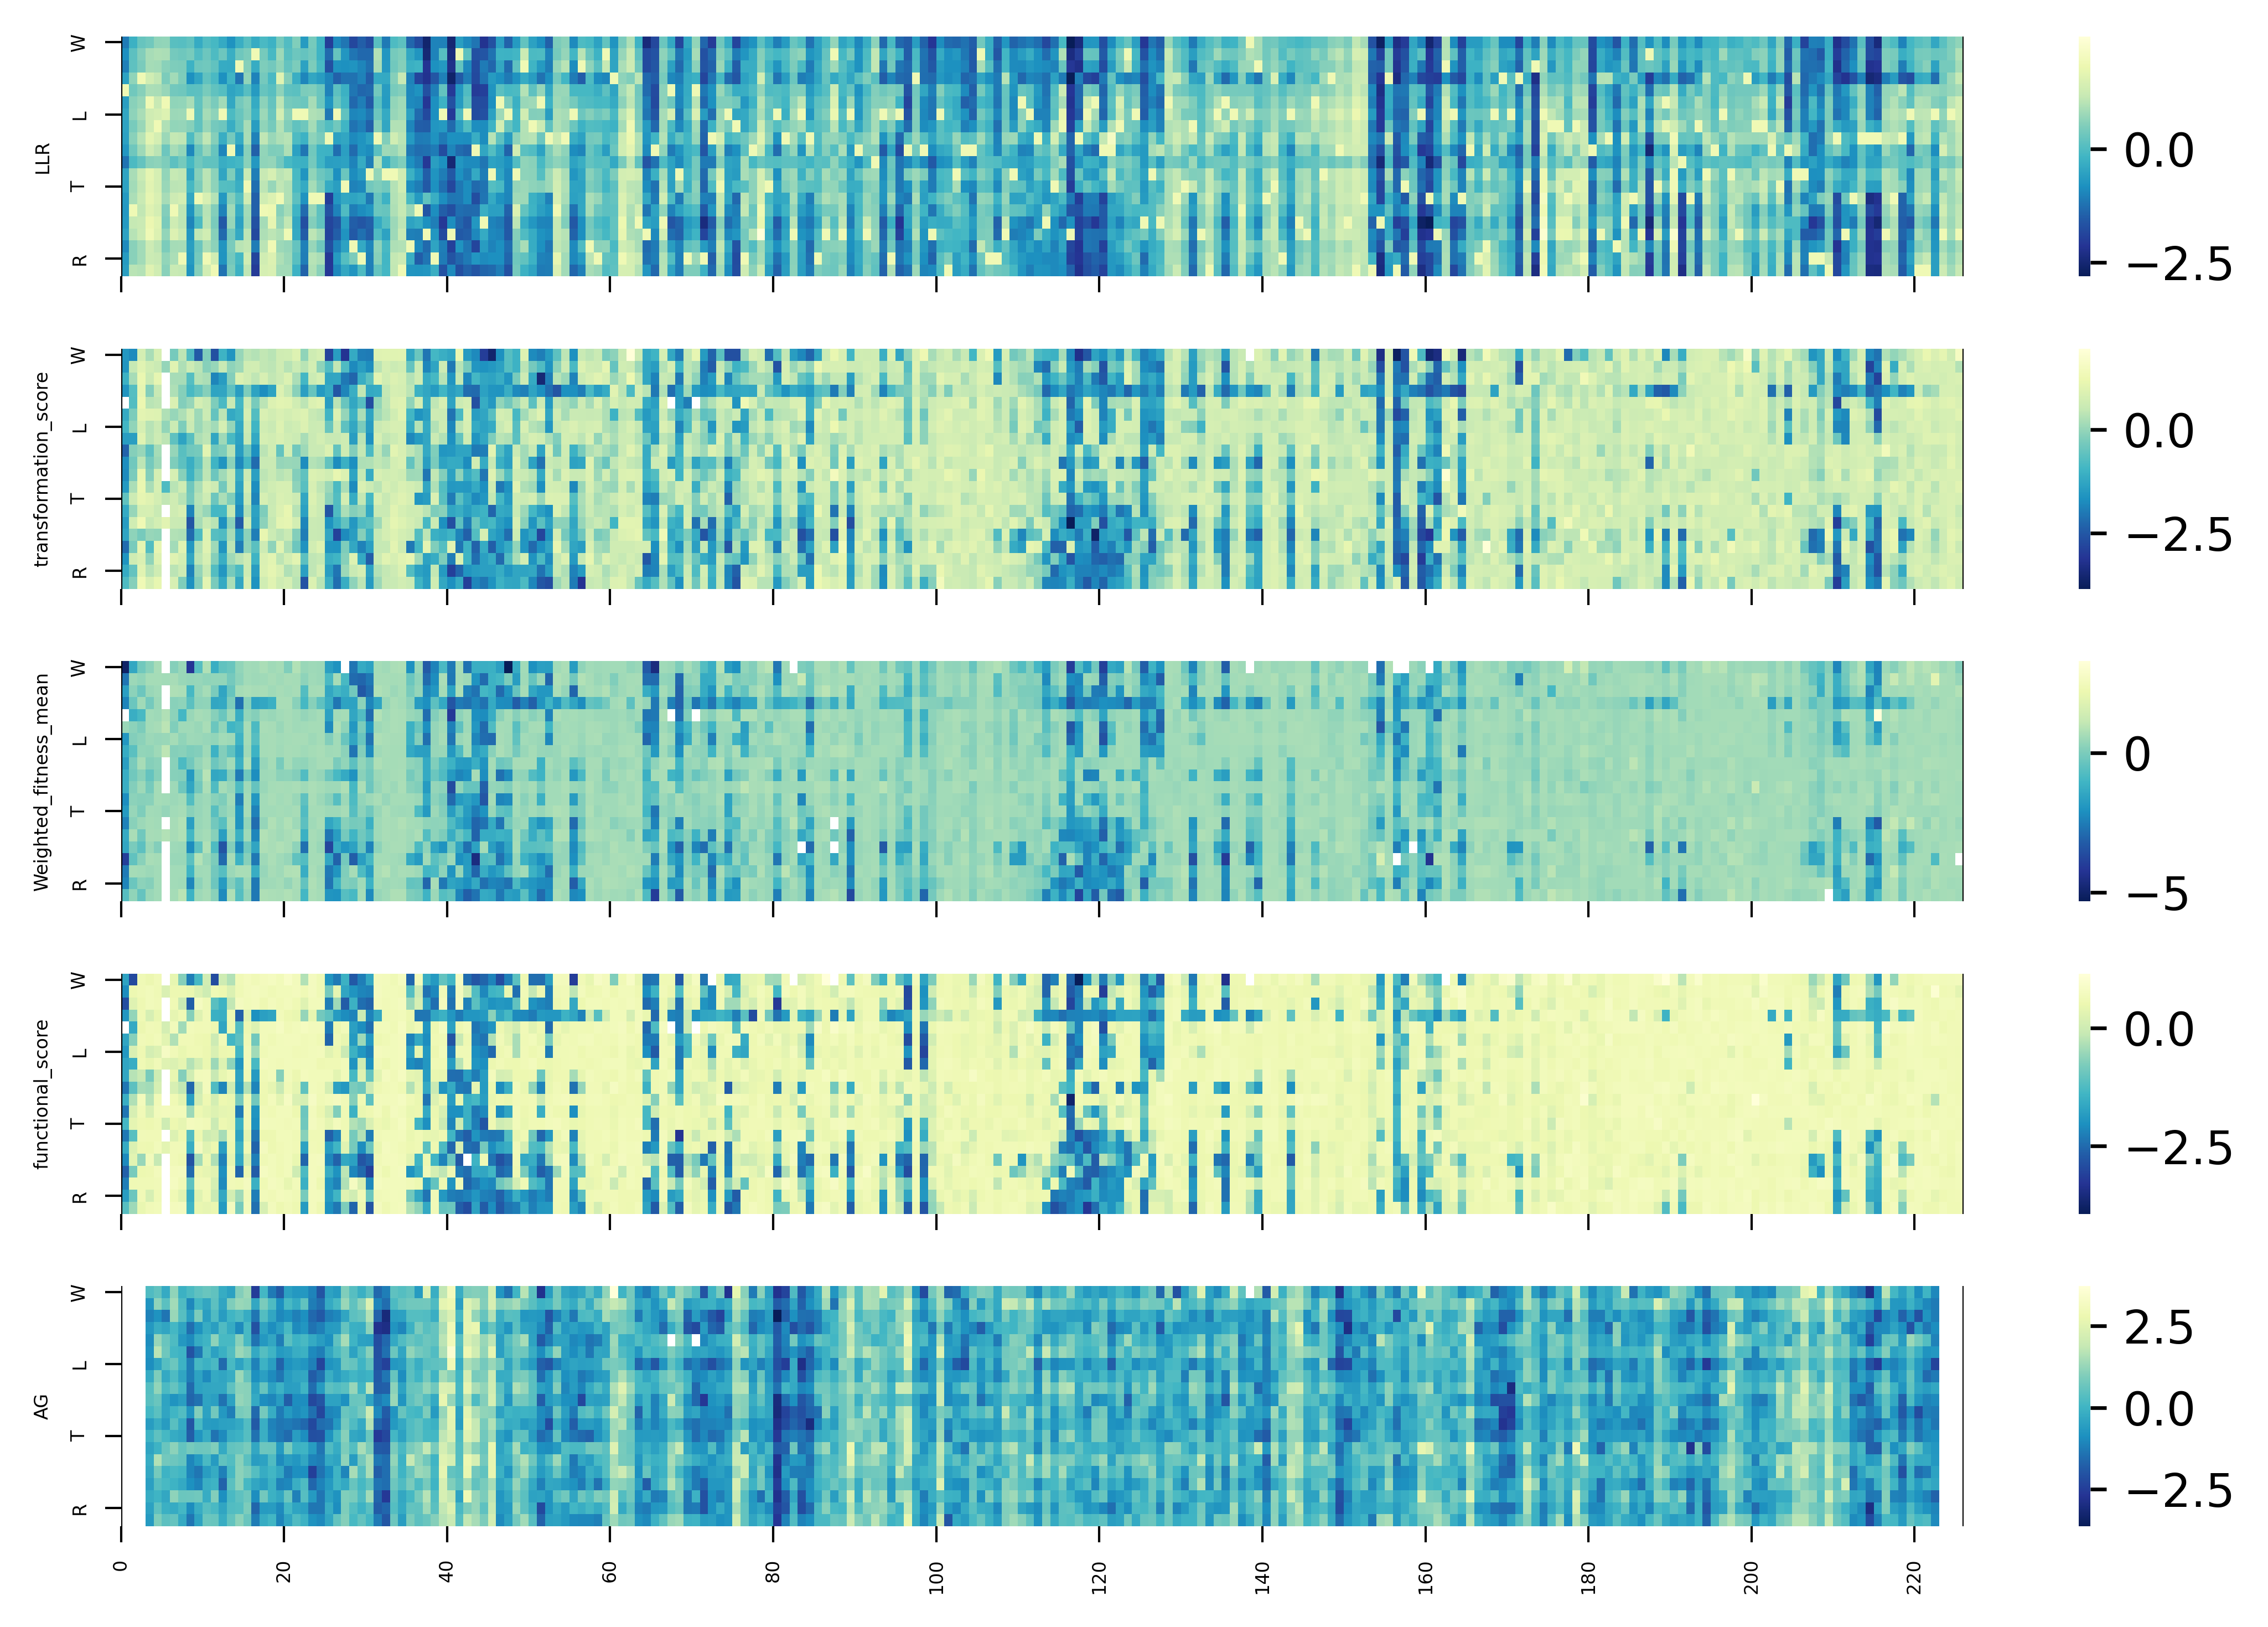

In [25]:
import seaborn as sns
sns.color_palette("light:b", as_cmap=True)
fig, ax = plt.subplots(5,1,figsize = (7.5,5), dpi = 600, sharey=True, sharex=True)
sns.heatmap(utility.return_ztransformed_dataframe(esm_matrix), ax =ax[0], cmap="YlGnBu_r", mask=pd.isnull(esm_matrix))
sns.heatmap(utility.return_ztransformed_dataframe(grouped_amino_acid_transformation_score), ax =ax[1], cmap="YlGnBu_r", mask=pd.isnull(grouped_amino_acid_transformation_score))
sns.heatmap(utility.return_ztransformed_dataframe(grouped_amino_acid_Weighted_fitness_mean), ax =ax[2], cmap="YlGnBu_r",  mask=pd.isnull(grouped_amino_acid_Weighted_fitness_mean))
sns.heatmap(utility.return_ztransformed_dataframe(grouped_amino_acid_functional_score_weighted_mean), ax =ax[3], cmap="YlGnBu_r",  mask=pd.isnull(grouped_amino_acid_functional_score_weighted_mean))
sns.heatmap(utility.return_ztransformed_dataframe(df_pos_aa_groupby_pivot), ax =ax[4], cmap="YlGnBu_r", mask=pd.isnull(df_pos_aa_groupby_pivot))

ax[0].set_ylabel("LLR")
ax[1].set_ylabel("transformation_score")
ax[2].set_ylabel("Weighted_fitness_mean")
ax[3].set_ylabel("functional_score")
ax[4].set_ylabel("AG")
ax[0].set_xticks(range(0,226,20))
ax[0].set_xticklabels(range(0,226,20))



for i in range(5):
    ax[i].axvline(x = 0, color = "black",  lw = 0.5)
    # ax[i].set_xlim(0, 226.1)
    ax[i].axvline(x = 226, color = "black",  lw = 0.5)

# fig.patch.set_facecolor('.15')
for i in range(5):
    ax[i] =  utility.custom_figure_axis(ax[i], fontsize=4, show_ticks = True)

plt.tight_layout()
#plt.savefig("/home/bernadettem/bernadettenotebook/rnc_final_figure/RNC all fitness heatmap.pdf", dpi = 600)

##### Associate the ESM1b score with fitness (weighted mean), functional score (weighted mean), and transformation score for each individual amino acid mutation at every position

In [26]:
df = pd.DataFrame(columns = ["esm",  "mean_funtional", "weighted_mean_fitness", "transformation score"])
df["esm"] = np.array(esm_matrix).ravel()
df["mean_funtional"] = np.array(grouped_amino_acid_functional_score_weighted_mean).ravel()
df["weighted_mean_fitness"] = np.array(grouped_amino_acid_Weighted_fitness_mean).ravel()
df[ "transformation score"] = np.array(grouped_amino_acid_transformation_score).ravel()
df["AG"] = np.array(df_pos_aa_groupby_pivot).ravel()
df

,esm,mean_funtional,weighted_mean_fitness,transformation score,AG
0,-13.620931,-1.451545,0.507755,-1.253029,NaN
1,-9.745703,-2.229149,0.820412,-1.366383,NaN
2,-7.449059,-0.009325,0.929236,-0.003913,NaN
3,-7.043359,-0.072277,0.964793,-0.305145,-0.789728
4,-5.588293,0.004082,1.001759,0.011232,0.401011
...,...,...,...,...,...
4515,0.000000,-0.051895,1.009952,-0.022885,-0.789045
4516,-11.277198,-0.057080,0.994926,-0.184749,-7.122071
4517,-2.867886,0.034873,1.000771,0.015705,NaN
4518,-4.937543,-0.032189,1.002303,0.112630,NaN


##### Calculate corelation between all the score

In [27]:
df.corr()

,esm,mean_funtional,weighted_mean_fitness,transformation score,AG
esm,1.000000,0.603776,0.626566,0.653926,-0.063604
mean_funtional,0.603776,1.000000,0.885685,0.831170,-0.074984
weighted_mean_fitness,0.626566,0.885685,1.000000,0.827767,-0.062823
transformation score,0.653926,0.831170,0.827767,1.000000,-0.056251
AG,-0.063604,-0.074984,-0.062823,-0.056251,1.000000


In [28]:
df.dropna(subset=["AG"], inplace=True)
df.dropna(subset=["transformation score"], inplace=True)
df.dropna(subset=["weighted_mean_fitness"], inplace=True)
df.dropna(subset=["mean_funtional"], inplace=True)
df.reset_index( inplace=True, drop=True)

In [29]:
df

,esm,mean_funtional,weighted_mean_fitness,transformation score,AG
0,-7.043359,-0.072277,0.964793,-0.305145,-0.789728
1,-5.588293,0.004082,1.001759,0.011232,0.401011
2,-8.177467,-0.132491,0.958052,-0.585895,3.704395
3,-8.278591,-0.823618,0.986252,-0.197515,-2.581580
4,-7.790459,-1.795704,0.578469,-0.833463,-1.126362
...,...,...,...,...,...
4363,-15.561694,-0.865352,0.935696,-0.647557,-5.157741
4364,-11.999422,0.041437,1.002061,-0.268571,0.726392
4365,0.000000,0.030921,0.992711,-0.097362,-1.536117
4366,0.000000,-0.051895,1.009952,-0.022885,-0.789045


In [34]:
def plot_heatmap(data, row_index, col_index, columns, index):

    from scipy.stats import mannwhitneyu, fisher_exact
    from sklearn.metrics import confusion_matrix

    sns.color_palette("Blues", as_cmap=True)

    col_binary = np.where(data[col_index] > data[col_index].median(), 1, 0) # binarize the accumulated gain with zero as cut off
    row_binary = np.where(data[row_index] > np.median(data[row_index]), 1, 0) # binarize the sum of allele count with median as cut off
    cm = confusion_matrix(row_binary, col_binary)

    confusion_df = pd.DataFrame(cm, columns=columns, index=index) # prepare the confusion matrix

    odds_ratio, p_value_fisher = fisher_exact(np.array(confusion_df))

    print("The confusion matrix is: \n", confusion_df)
    print("Fisher's exact test p-value:", p_value_fisher)


    fig, ax = plt.subplots(1, 2, dpi = 600, figsize=(4,2))
    sns.heatmap(confusion_df, annot=True, ax = ax[0], annot_kws={"size": 3}, fmt='.6g', cmap = "Blues")

    sns.heatmap(confusion_df/np.array(confusion_df).mean(axis=0), ax=ax[1], annot=True, fmt='.4g', annot_kws={"size": 3}, cmap = "Blues")
    ax[0].set_title("Original heatmap", fontsize = 3)
    ax[1].set_title("column normalized heatmap", fontsize = 3)
    ax[0].tick_params(axis='x', labelsize=3)  
    ax[0].tick_params(axis='y', labelsize=3, rotation=90) 
    ax[1].tick_params(axis='x', labelsize=3)  
    ax[1].tick_params(axis='y', labelsize=3, rotation=90) 

    cbar0 = ax[0].collections[0].colorbar
    cbar0.ax.tick_params(labelsize=3)
    cbar1 = ax[1].collections[0].colorbar
    cbar1.ax.tick_params(labelsize=3)
    # plt.suptitle("confusion matrix with median as ag cutoff", fontsize = 4)
    plt.tight_layout()


    return ax




##### confusion matrix with mean_functional and AG

The confusion matrix is: 
                       g_neg  g_pos
mean_functional_low    1057   1127
mean_functional_high   1127   1057
Fisher's exact test p-value: 0.036782609137882075


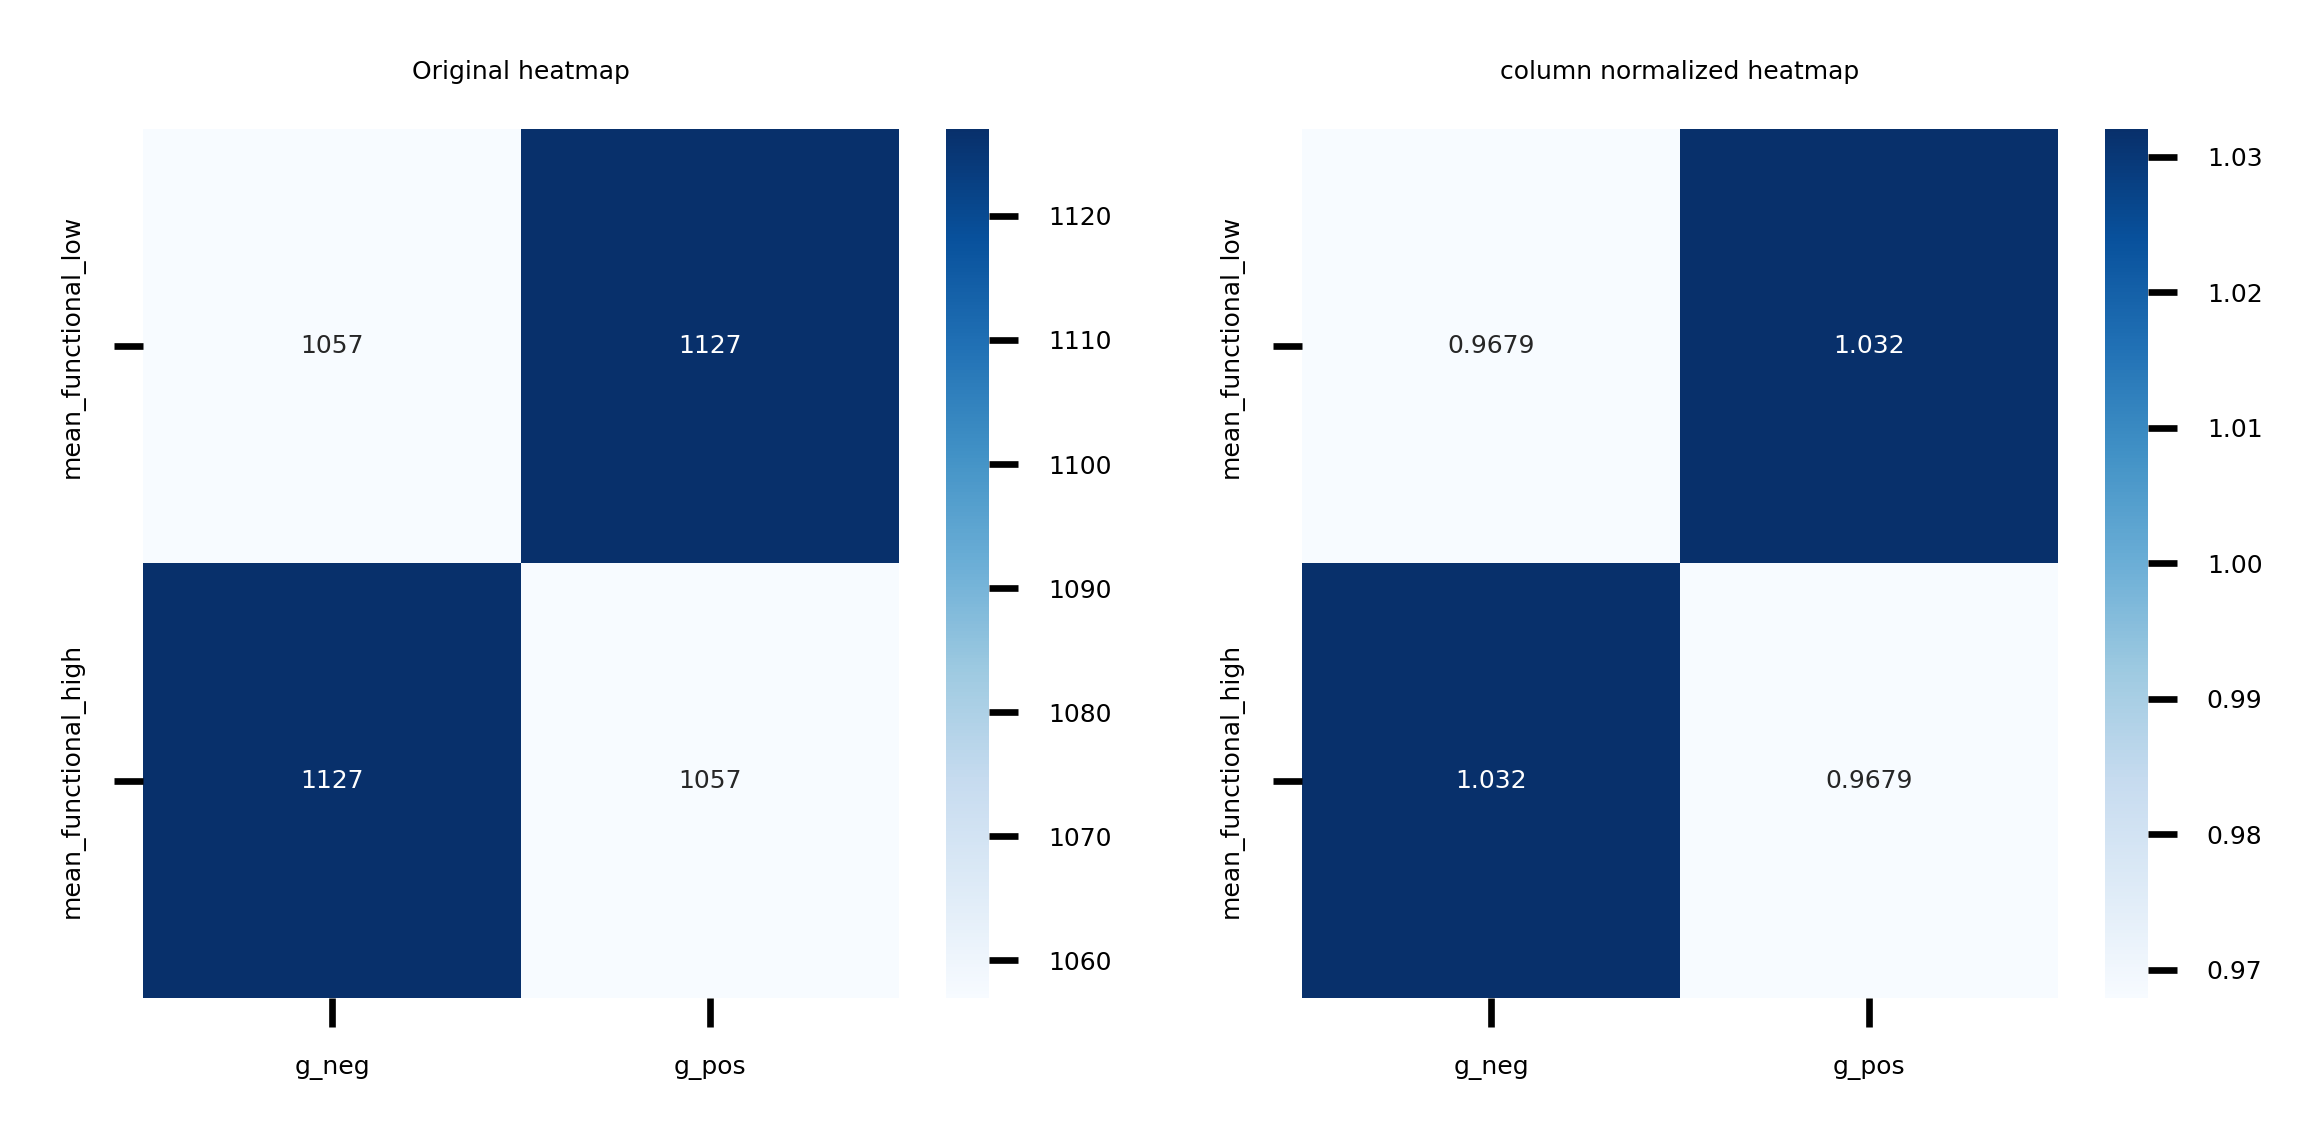

In [35]:
ax = plot_heatmap(data=df, row_index = "mean_funtional", col_index = "AG", columns=['g_neg', 'g_pos'], index=['mean_functional_low', 'mean_functional_high'])
plt.savefig("cm mf vs ag.pdf", dpi = 600)

##### confusion matrix with weighted_mean_fitness and AG

The confusion matrix is: 
                             g_neg  g_pos
weighted_mean_fitness_low    1037   1147
weighted_mean_fitness_high   1147   1037
Fisher's exact test p-value: 0.0009699111462562743


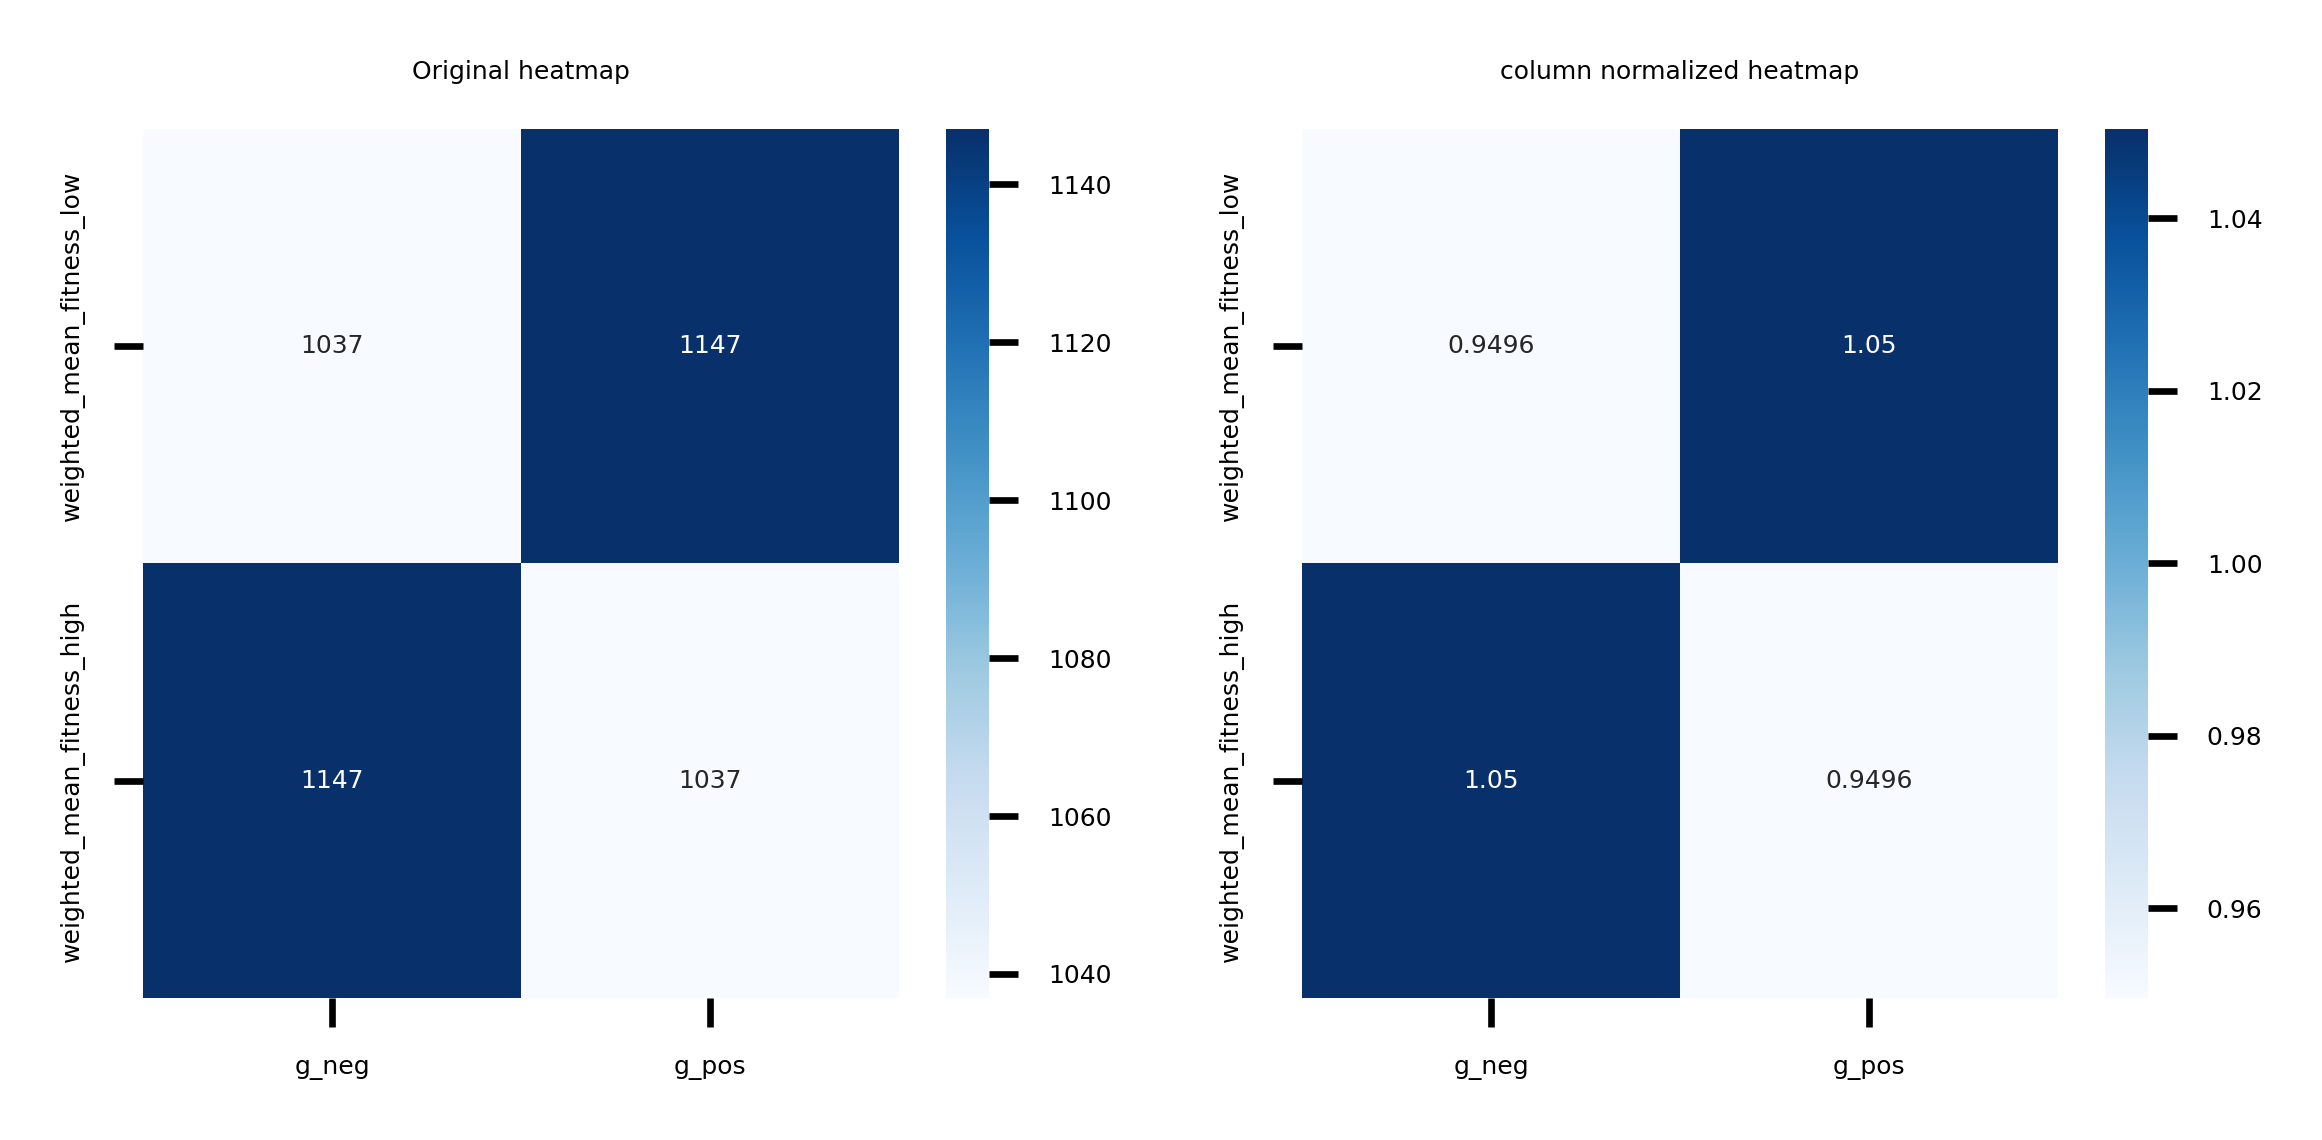

In [37]:
ax = plot_heatmap(data=df, row_index = "weighted_mean_fitness", col_index = "AG", columns=['g_neg', 'g_pos'], index=['weighted_mean_fitness_low', 'weighted_mean_fitness_high'])
plt.savefig("cm weighted_mean_fitness vs ag.pdf", dpi = 600)

##### confusion matrix with transformation score and AG

The confusion matrix is: 
                            g_neg  g_pos
transformation score_low    1043   1141
transformation score_high   1141   1043
Fisher's exact test p-value: 0.0033270989779913725


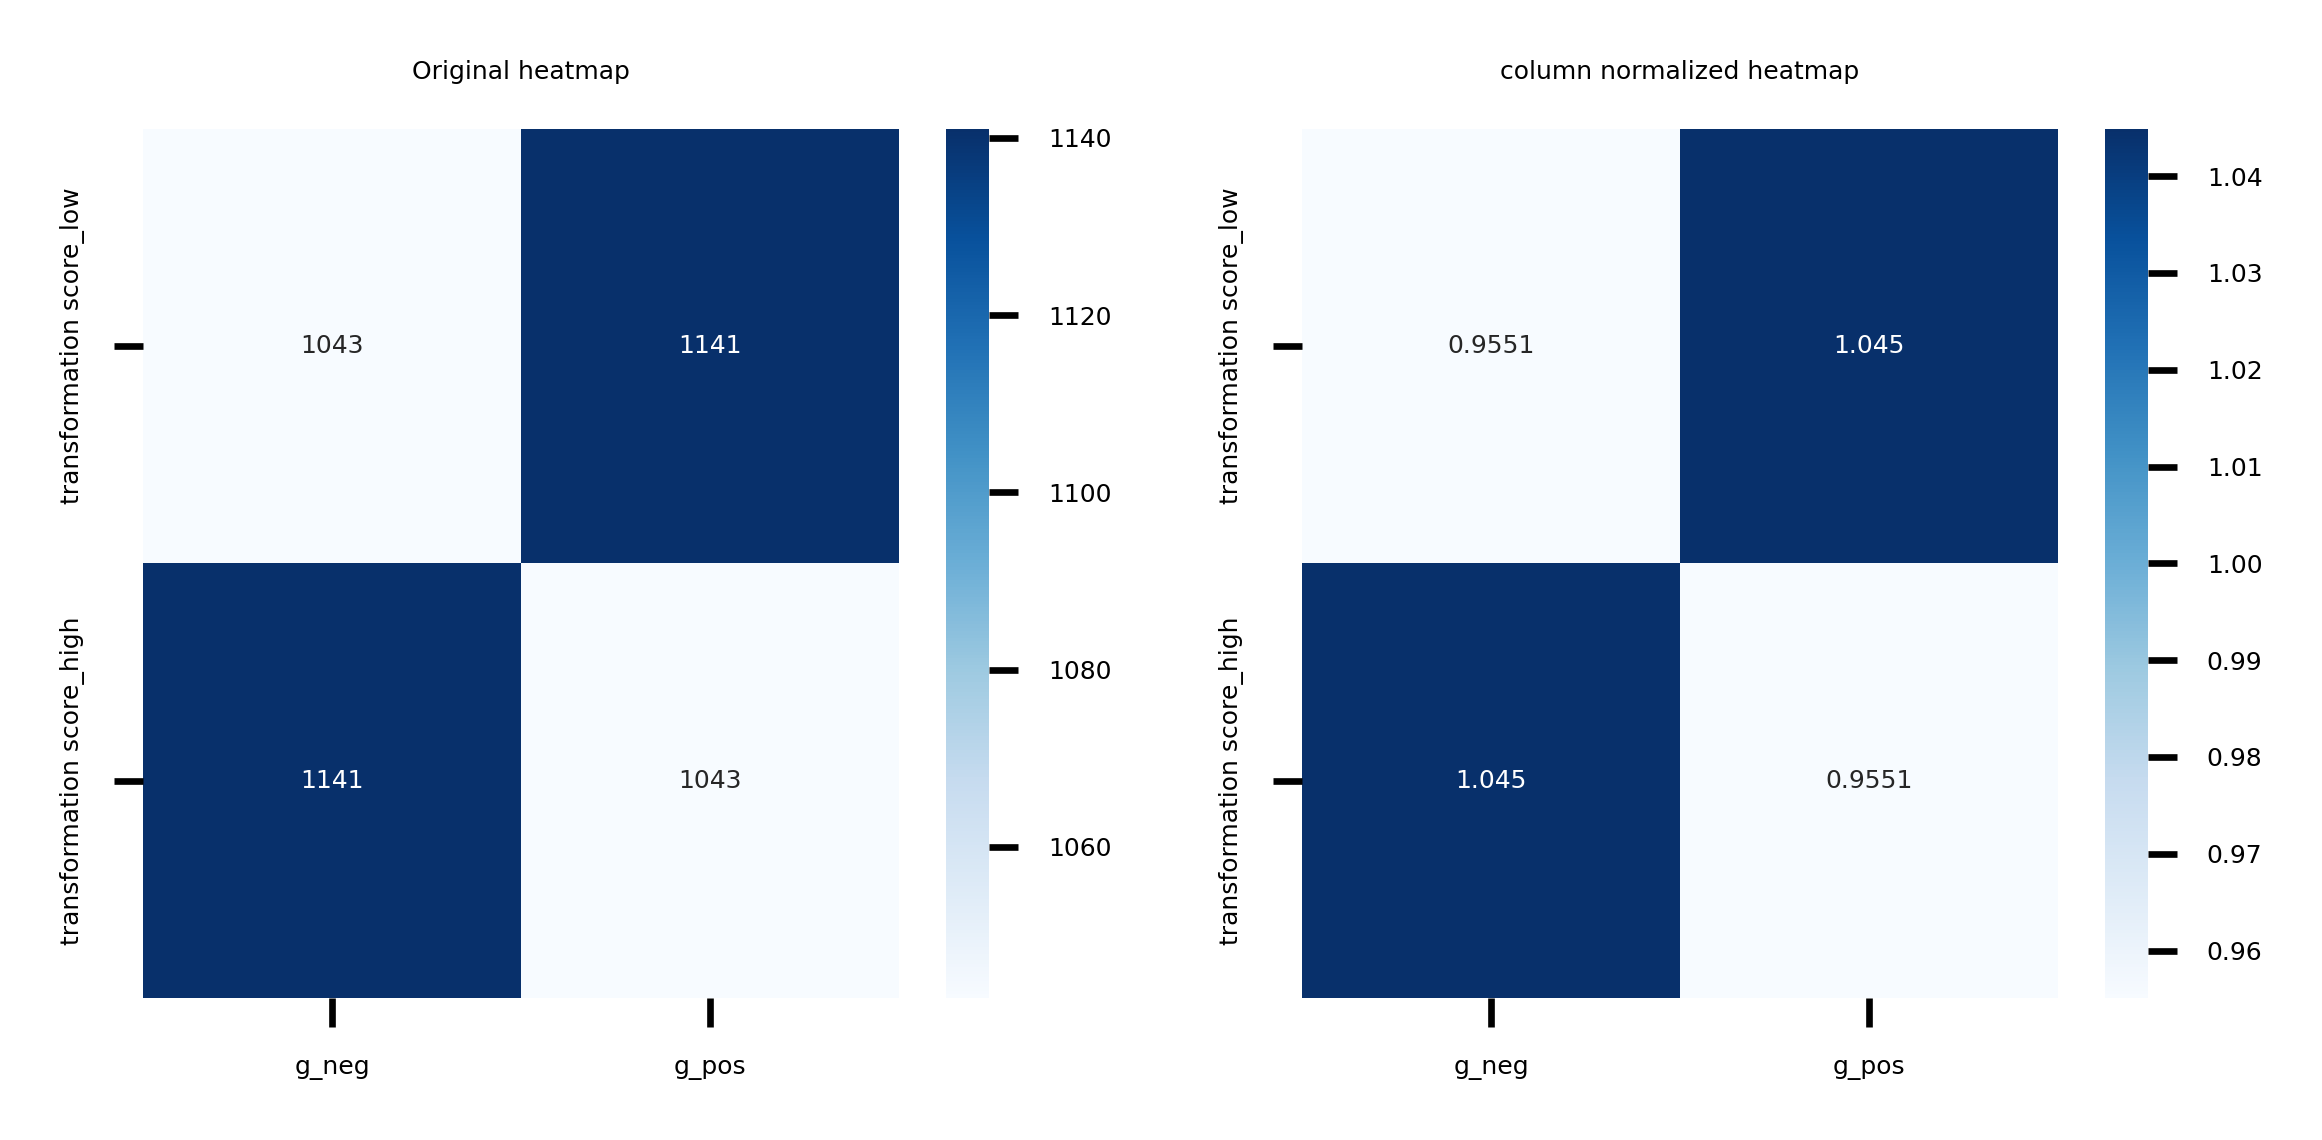

In [38]:
ax = plot_heatmap(data=df, row_index = "transformation score", col_index = "AG", columns=['g_neg', 'g_pos'], index=['transformation score_low', 'transformation score_high'])
plt.savefig("cm transformation score vs ag.pdf", dpi = 600)